## Mandatory Imports

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

## 📊 What is the Anscombe Dataset?

The **Anscombe's Quartet** is a collection of four datasets (I–IV) each containing 11 pairs of `(x, y)` values. Introduced by the statistician **Francis Anscombe** in 1973, it serves as a powerful reminder that:

> **"Summary statistics alone do not tell the full story of your data."**

All four datasets have:
- Nearly identical means and variances for both `x` and `y`
- The same linear regression line (`y = 3 + 0.5x`)
- The same coefficient of determination (R² ≈ 0.67)
- The same correlation coefficient (r ≈ 0.82)

Despite having identical statistical summaries, when plotted, the datasets look dramatically different. This illustrates the importance of **visualizing data** before performing statistical analysis or machine learning.

In this notebook, we start with **Dataset I**, which is a textbook example of linear correlation.

In [2]:
df = sns.load_dataset("anscombe")
df1 = df[df["dataset"] == "I"]
df1.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


## 📈 What Are Data Statistics? Why Are They Important?

**Descriptive statistics** are numerical values that summarize and describe the features of a dataset. They provide an initial understanding of the data's **central tendency**, **variability**, and **distribution**.

### 📌 Key Data Statistics:

- **Mean (Average)**: Sum of all values divided by count. Gives a measure of central tendency.
- **Variance**: Measures the dispersion of the data around the mean. Higher variance = more spread out.
- **Standard Deviation (σ)**: Square root of variance; it has the same units as the data and describes spread.
- **Min/Max**: Show the data range.
- **Percentiles (25%, 50%, 75%)**: Show how data is distributed around the median.

### 💡 Why Are They Important?

- They help us **understand the scale and behavior** of the dataset.
- They are used to **detect anomalies or outliers**.
- They inform us whether certain statistical or machine learning methods are appropriate.
- They are critical for **data preprocessing** and **feature engineering**.

However, as shown by Anscombe’s Quartet, relying only on these statistics—**without visualization**—can lead to incorrect conclusions.

## 🔗 What is Correlation? Mathematical Concept and Usage

**Correlation** is a statistical measure that describes the degree to which two variables move in relation to each other.

### 📌 Pearson Correlation Coefficient (r)

Mathematically:
$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}}$

Where:
- $x_i, y_i$: individual data points
- $\bar{x}, \bar{y}$: mean of x and y respectively

### 🔢 Interpretation:

| r Value     | Meaning                      |
|-------------|------------------------------|
| +1          | Perfect positive correlation |
| 0           | No linear correlation        |
| -1          | Perfect negative correlation |

### 🧠 Usage:

- Assess **strength and direction** of linear relationships.
- Identify **multicollinearity** in multiple regression.
- Aid in **feature selection** in machine learning.

⚠️ **Note**: Correlation **does not imply causation**. Also, it only captures **linear relationships**, not curved or non-linear ones.

In [ ]:
print("Data Types:\n", df1.dtypes)
print("\nBasic Statistics:\n", df1.describe())
print("\nCorrelation:\n", df1['x'].corr(df1['y']))

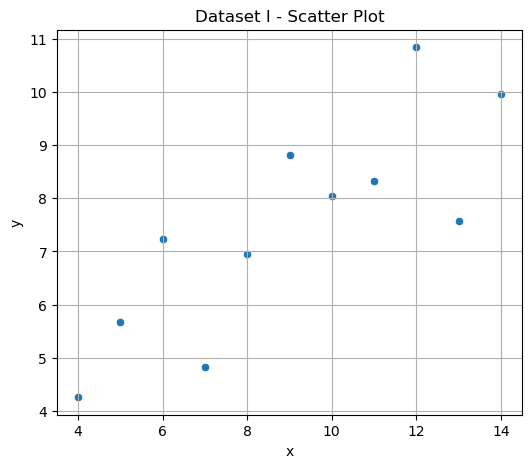

In [3]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="x", y="y", data=df1)
plt.title("Dataset I - Scatter Plot")
plt.grid(True)
plt.show()

## 📐 What is Linear Regression? What is the Logic Behind It?

**Linear Regression** is a fundamental algorithm in statistics and machine learning that models the relationship between a **dependent variable `y`** and one or more **independent variables `x`** by fitting a linear equation:

\[
y = \beta_0 + \beta_1 x + \epsilon
\]

Where:
- \( \beta_0 \): Intercept (value of y when x = 0)
- \( \beta_1 \): Slope (change in y for one unit change in x)
- \( \epsilon \): Error term (residual)

### 🔍 Logic:

- It tries to find the **best-fitting straight line** through the data points.
- It minimizes the **Sum of Squared Errors (SSE)** using the **Least Squares Method**:
  
\[
\text{SSE} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
\]

- The model is trained to choose \( \beta_0 \) and \( \beta_1 \) that **minimize SSE**.

### 💡 Applications:
- Predicting future values (forecasting)
- Understanding relationships between variables
- Feature importance ranking in ML

In [4]:
X = df1[['x']]
y = df1['y']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R² Score:", model.score(X, y))

Intercept: 3.0000909090909103
Slope: 0.5000909090909091
R² Score: 0.666542459508775


## 📏 What Does the Linear Regression Line Signify?

The **regression line** is the predicted relationship between input and output variables. It shows how the target variable `y` is expected to change as input `x` changes.

$\text{Regression line: } \hat{y} = \beta_0 + \beta_1 x$

### ✅ Interpretation:
- The **slope (β₁)** shows how much y increases/decreases with x.
- The **intercept (β₀)** is the predicted y when x = 0.

### 🤔 Common FAQs:

- **Does a good fit mean high accuracy?**  
  Not always. You should always check residuals and R².

- **Can it fit curved data?**  
  No—linear regression assumes linearity. Curved patterns should use polynomial or other models.

- **Does the line pass through all points?**  
  No. It minimizes squared vertical errors—not perfect fit.

- **Is it affected by outliers?**  
  Yes. One strong outlier can drastically change the slope.

- **Does a higher R² mean better model?**  
  Not always. Overfitting can increase R² but reduce generalizability.

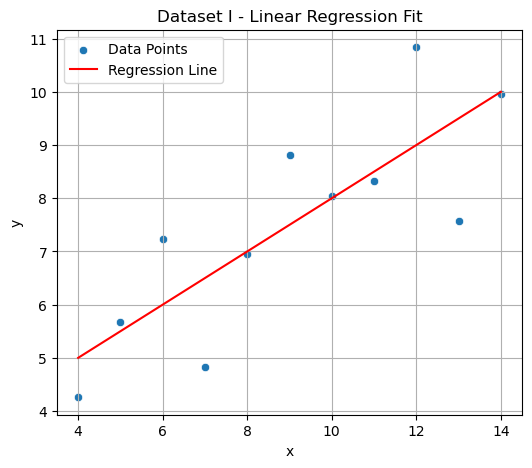

In [5]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="x", y="y", data=df1, label="Data Points")
sns.lineplot(x=df1["x"], y=model.predict(X), color='red', label="Regression Line")
plt.title("Dataset I - Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

## 📉 What Does the Residual Plot Mean?

**Residuals** are the differences between the **actual values** and the **predicted values** from your regression model:

$\text{Residual} = y_{\text{actual}} - y_{\text{predicted}}$

A **residual plot** shows residuals on the vertical axis and the corresponding `x` values on the horizontal axis.

### 🔍 Why Is It Important?

- Helps **diagnose model assumptions**:
  - Residuals should be **randomly scattered** (no pattern).
  - If there's a curve or funnel shape, the **linearity or homoscedasticity** assumptions may be violated.
  
- Detect **outliers and influential points**.

### ✅ Ideal Residual Plot:

- Randomly scattered points around zero.
- No visible pattern or structure.

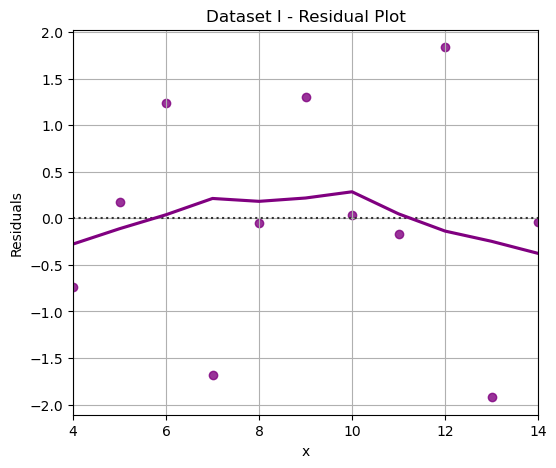

In [6]:
residuals = y - model.predict(X)

plt.figure(figsize=(6,5))
sns.residplot(x=df1["x"], y=df1["y"], lowess=True, color="purple")
plt.title("Dataset I - Residual Plot")
plt.xlabel("x")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## 📊 What Does the OLS Summary Mean? (Bonus Topic)

The **Ordinary Least Squares (OLS)** summary from `statsmodels` provides a detailed statistical output of the linear regression model.

### 🧾 Key Components:

- **coef**: Estimated coefficients \( \beta_0, \beta_1 \)
- **std err**: Standard error of the coefficient estimate
- **t**: t-statistic to test significance of coefficients
- **P>|t|**: p-value; checks if coefficients are statistically significant (< 0.05 means significant)
- **[0.025, 0.975]**: 95% confidence interval of coefficients

### 📈 Goodness-of-Fit Metrics:

- **R-squared**: Proportion of variance in y explained by x.
- **Adj. R-squared**: Adjusted for number of predictors (useful for multiple regression).
- **F-statistic**: Tests if model explains a significant portion of variance.
- **Prob (F-statistic)**: p-value for the overall model fit.
- **Durbin-Watson**: Tests for autocorrelation in residuals.
- **Omnibus / Jarque-Bera**: Tests for normality in residuals.

### ✅ Summary:

OLS gives both **interpretability and diagnostics**, which help you judge **how trustworthy and robust** the model is.


In [7]:
X_sm = sm.add_constant(X)  # adds intercept
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sat, 21 Jun 2025   Prob (F-statistic):            0.00217
Time:                        18:59:11   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

c:\Users\Paperchase\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
